# A Multi-platform DICOM Toolbox for Academic Radiologists




The Digital Imaging and Communications in Medicine (DICOM) standard is used to store and transmit medical images.  Radiology workstations attached to a picture archiving and communication systems (PACS) are used to display these images for diagnostic purposes.  

However, diagnostic workstations are sometimes not optimal for academic research purposes.  It is often necessary to anonymize DICOM images for research studies or for publication.

This Jupyter notebook contains code to accomplish several useful tasks with DICOM images.

1. How do I open and view a DICOM image?
2. How do I view and edit DICOM data elements?
2. How do I anonymize a DICOM image?
4. How do I anonymize a whole folder of DICOM images?
5. How do I save a DICOM image as some other format (.JPG, .PNG, .TIFF)?
6. How do I window/level and otherwise optimize a DICOM image?
7. How do I invert a gray-scale image?
8. How do I flip an image about its horizontal and vertical axes?
9. How do I open a color DICOM image?
10. How do I redact protected health information that is embedded within an image (i.e. US or radionuclide images)?


This toolbox includes several [HIPAA-compliant](https://www.hhs.gov/hipaa/index.html) DICOM images for your delectation.  We have done our best to replace every bit of the original protected health information (PHI) with fictitious entries, using names and locations of characters from the works of Mark Twain.


### Installing pydicom

This notebook assumes that you have already installed Jupyter and scientific Python.  If not, we highly recommend the [Anaconda Python distribution](https://www.continuum.io/downloads).  The Anaconda distribution makes it easy to conveniently install Python, the Jupyter Notebook, and many other commonly used packages for scientific computing and data science.

While Anaconda contains many wonderful packages for science and mathematics, it does not know how to deal with DICOM images.  However, there is a great and free add-on package called pydicom, and located at the [Anaconda website](https://anaconda.org/conda-forge/pydicom).  

You can install pydicom on your system very simply via this Jupyter notebook.  Simply select the next cell in this notebook and hit shift-Return.  

#### _Please note that this only has to be done_ ***once***.

In [ ]:
!conda install -c conda-forge pydicom=0.9.9 --yes

Having installed pydicom, it is now time to work with some images.

### Loading a few useful libraries

First, we will ask Python to import a few useful libraries that will do the heavy lifting for us:

1. [pydicom](http://pydicom.readthedocs.io) --- each time we start up our notebook, we need to reload this library.  Oddly enough, loading this requires that we type "import dicom", rather than "import pydicom".
2. [matplotlilb](http://matplotlib.org) --- we will use this rather powerful library to do most of the actual plotting.
3. [numpy](http://www.numpy.org) --- an amazing library of mathematical routines
4. [scikit-image library](http://scikit-image.org) --- a number of useful image-processing routines
5. [os](https://docs.python.org/3/library/os.html) --- this module to perform certain operating system functions, such as reading or writing a file
6. [glob](https://docs.python.org/3/library/glob.html) --- this module finds all the pathnames matching a specified pattern, which is useful in performing operations on every file found in a given folder
7. [datetime](https://docs.python.org/3/library/datetime.html) --- this module  allows one to manipulate dates and times in both simple and complex ways


In [2]:
# this following line tells Jupyter to display images here in the browser, 
# rather than in separate window.

%matplotlib inline 

# import pydicom library

import dicom

# import matplotlib and numpy

import matplotlib.pyplot as plt 
import matplotlib.image as mpimage
import numpy as np 

In [13]:
# load some handy functions from the scikit-image library

from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

# import operating system and glob libraries

import os, glob

# import some useful date functions

from datetime import datetime

## 1. Reading and viewing a DICOM image

We have included several sample DICOM images in this tutorial.  This example uses an image called: "Knee_MR.dcm".  We will now show you how to load and view this image using Jupyter.

In [4]:
ds1 = dicom.read_file("Knee_MR.dcm")  # read the DICOM image into memory

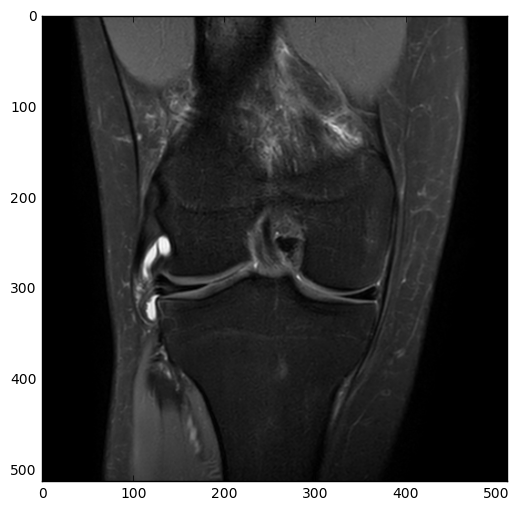

In [5]:
# tell matplotlib to display our images as a 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 

# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(ds1.pixel_array, cmap=plt.cm.gray) 

Voilà!  A coronal MR image is now visible for our delectation.

Now, let's look at the DICOM header to learn a bit more about this patient.

## 2. Examining data elements in the DICOM image header

The DICOM file format is extremely large and complex.  It contains not only the image pixel data, but also a large image header with many [DICOM_data_elements][1].  These data elemenets contain patient identifiers and detailed information about the imaging device and how the image was obtained.

Thankfully, most DICOM files that we use will not include every possible data element from the DICOM standard.  However, there will be a bunch of them.  To see what is lurking under the hood on this image, select the code field below, and hit shift-return.  Then, take a moment and scroll through some of the many data fields that were included in this image file.

[1]: <http://dicom.nema.org/medical/dicom/current/output/chtml/part06/chapter_6.html>

In [6]:
ds1

(0008, 0000) Group Length                        UL: 1466
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '18840101'
(0008, 0013) Instance Creation Time              TM: '133545.040'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.89.5
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.42127.5.0.5000.2015050113333847378
(0008, 0020) Study Date                          DA: '18840101'
(0008, 0021) Series Date                         DA: '18840101'
(0008, 0022) Acquisition Date                    DA: '18840101'
(0008, 0023) Content Date                        DA: '18840101'
(0008, 0030) Study Time                          TM: '131343'
(0008, 0031) Series Time                         TM: '133150.18000'
(0008, 0032) A

Most of the time, we are only interested in a few of these fields.  Rather than dumping the whole list, we can pick and choose the ones we want.  

Since one may not always remember the exact name of a data element, the pydicom library provides a handy dir() method, useful during interactive sessions at the python prompt.  Using this command, we can quickly find the names of all data elements that have the word "patient" in them thusly:

In [7]:
ds1.dir("patient")

['AdditionalPatientHistory',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'PatientAge',
 'PatientBirthDate',
 'PatientComments',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientState',
 'PatientTransportArrangements',
 'PatientWeight']

We can now examine any of these one by one, as shown below:

In [8]:
ds1.PatientName # show patient name

'Finn, Huckleberry'

In [9]:
ds1.PatientSex # show patient gender

'M'

In [10]:
ds1.AcquisitionDate # show date of study acquisition

'18840101'

In [11]:
ds1.PatientAge # show patient's age at time of scan

'14'

### Changing Data Elements in a DICOM file

Sometimes, data (such as age) is sometimes entered incorrectly by a data entry minion.  One way to check this is to see if the age entered is congruent with the date of birth and the date of study. We can do this with the following Python code: 

In [14]:

DOB = datetime.strptime(ds1.PatientBirthDate, "%Y%m%d")
StudyDate = datetime.strptime(ds1.StudyDate, "%Y%m%d")
Age = (StudyDate - DOB).days/365

print ("Age = ", Age)

Age =  14.008219178082191


Sometimes a lot of time has passed since an image was done, and we might like to know how old our patient is currently.  We can calculate this by subtracting the date of birth from the current date.  In this case, the DICOM header suggests that this patient was born on January 1, 1870.  The following Python code will grab today's date and do the calculation: 

In [17]:
DOB = datetime.strptime(ds1.PatientBirthDate, "%Y%m%d")
now = datetime.now()
Age = (now - DOB).days/365

print ("Current age = ", Age, "years")

Current age =  147.67945205479452 years


For an timeless literary character such as Huckleberry Finn, 147+ years does not seem excessive.  For most actual patients, a result like this suggests a data entry error.  If a quick audit were to show that the actual birthdate were July 4, 1970, we could fix the incorrect birthdate with the following code:

In [18]:
PatientBDActual = '19700704' 

ds1.PatientBirthDate = PatientBDActual # change birthdate

We can change any other DICOM data field in a similar manner.  

Once we have made all of the changes we desire, our next step is to save all of our changes in a new DICOM image file, which we will call "Knee_MR_corrected.dcm".

In [19]:
ds1.save_as("Knee_MR_corrected.dcm") # save as new file with corrected birthdate

## 3. Anonymizing a DICOM image file

In order to comply with the Health Insurance Portability and Accountability Act (HIPAA), it is occasionally necessary to anonymize the protected health information (PHI) contained in a DICOM image. Guidance as to which data elements constitute PHI can be found at the [U. S. Health & Human Services website](https://www.hhs.gov/hipaa/for-professionals/privacy/special-topics/de-identification/#standard). 

One can anonymize a DICOM image file by changing the PHI fields to blank or neutral values, as shown in the section above.

However, one can also completely delete the PHI fields from the DICOM image file using the "del" command.  The lines of code shown below demonstrate how one might delete the fields for the following PHI elements:

1. Patient name
2. Accession number
3. Medical record number
4. Date of Birth

In [20]:
# delete the following DICOM data elements
del ds1.PatientName
del ds1.AccessionNumber
del ds1.PatientID
del ds1.PatientBirthDate

ds1.save_as("Knee_MR_anonymized.dcm") # save as new file with deleted PHI

## 4. Anonymizing a folder of DICOM image files

Anonymizing a single DICOM image file by hand can be tedious enough.  Anonymizing a whole folder of DICOM images is cruel and unusual punishment.  The following code will allow you to anonymize an entire folder of DICOM images without breaking a sweat.  You're welcome.

The following code will look in a folder called "files_to_anonymize", which is at the same location as this DICOM toolbox notebook.

When you run the following code, it will do the following:

1. create a list of every file in the "files_to_anonymize" folder
2. sequentially open each DICOM file
3. delete four PHI fields from the DICOM header
4. save the newly anonymized DICOM file, overwriting the original 
5. print out the name of each DICOM file as it is processed

**Caveat:**  If this program doesn't find any DICOM images in the folder called "files_to_anonymize", it will give an error message.  It will also give an error message if a DICOM image lackss any of the four PHI data elements for name, accession number, patient ID or birthdate (i.e. if they have already been anonymized).

You are welcome to edit the list of data elements in the code below to delete any data elements you desire.

In [188]:
# grab the name of every file in our folder
for filename in glob.iglob('files_to_anonymize/*.dcm', recursive=True):
    # read in a DICOM file into memory
    ds = dicom.read_file(filename, force=True)
    
    # get the name of the folder the dicomfiles are stored in
    foldername=os.path.basename(os.path.dirname(os.path.dirname(filename)))
    
    #delete patient name, accesion number, patient ID and patient birthdate
    del ds.PatientName
    del ds.AccessionNumber
    del ds.PatientID
    del ds.PatientBirthDate

    # overwrite the original file
    dicom.write_file(filename,ds)
    
    # output progress to the screen
    print(filename)

files_to_anonymize/CT_chest.dcm
files_to_anonymize/Hand.dcm
files_to_anonymize/Knee_MR.dcm
files_to_anonymize/knee_radiograph.dcm


## 5. Saving a DICOM image in another format

There are a lot of good reasons for converting a DICOM image into another format, such as the .JPG, .PNG or .TIFF formats.  The .JPG and .PNG formats are perfect for use with a website.  When submitting an image for publication, journals often request that the image file be submitted in .TIFF format.

The following code will take the image data from the DICOM pixel array  and save a copy in the .JPG, .PNG and .TIFF formats:

In [22]:
plt.imsave('knee_MR.jpg', ds1.pixel_array, cmap=plt.cm.gray)
plt.imsave('knee_MR.png', ds1.pixel_array, cmap=plt.cm.gray)
plt.imsave('knee_MR.tif', ds1.pixel_array, cmap=plt.cm.gray)

## 6. Optimizing a DICOM image

The Scientific Python (SciPy) library contains a number of handy image processing routines as part of the scikit-image library.  These routines will come pre-installed as part of the Anaconda or Enthought Python distributions.  In addition to scikit-image, we will also use some of the routines from the Numerical Python (numpy) library.

Let us look again at our original knee MR, and see how we might optimze it.

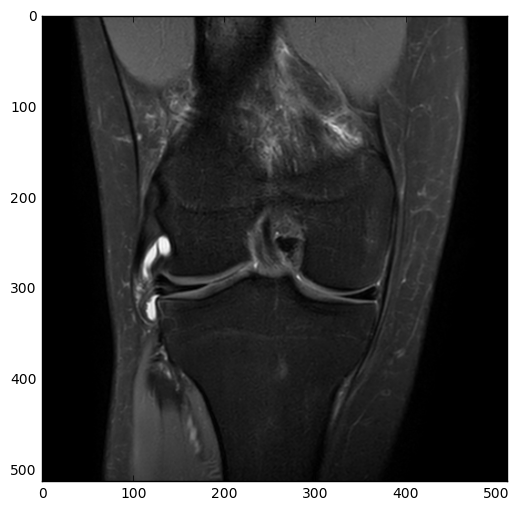

In [23]:
ds1 = dicom.read_file("Knee_MR.dcm")  # read the knee MR image into memory

# tell matplotlib to display our images as 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 

# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(ds1.pixel_array, cmap=plt.cm.gray) 

#### Image histograms can be useful

This knee MR is nice-looking, but it is a bit dark.  Let's have a look at the image histogram.  Histograms can often give us some helpful clues as the best way to optimize an image.


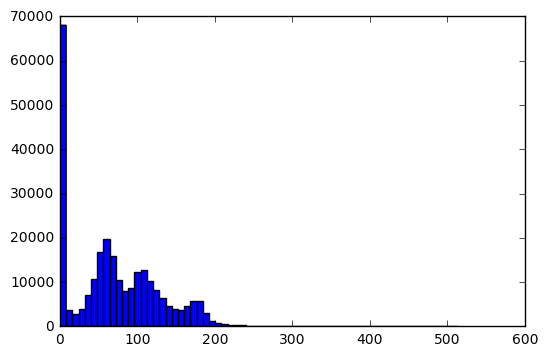

pixel array =  (512, 512)
minimum value =  0
maximum value =  513


In [28]:
plt.hist(ds1.pixel_array.flatten(), bins=64) # calculate a histogram of our image
plt.show() # display that histogram

print ("pixel array = ", ds1.pixel_array.shape)
print("minimum value = ", np.amin(ds1.pixel_array)) # find minimum pixel value in the image array
print("maximum value = ", np.amax(ds1.pixel_array)) # find maximum pixel value in the image array

Our MR image has 512 * 512 = 262,144 pixels. The pixels with the lowest value (0 in this case) are displayed as black.  The pixels with the highest value (513 in this case) are displayed as white.  All other values are assigned a value somewhere on a linear scale between black and white. 

This histogram of the our image shows that about 67,000 of the pixels are black (value = 0), as shown by the tallest bar over to the far left.  Although we know that our highest pixel value is 513, this histogram actually doesn't show much visible image information to the right of 260.  The histogram also shows us that pixel values of 260 will be mapped to a shade of gray halfway between black and white.

#### Window and level settings (aka contrast stretching)

Besides useful anatomical details, medical images often contain other things that are less relevant (the air outside the patient, right/left markers, etc.).  Depending on how the image was obtained, a number of gray shades may be devoted to these less interesting structures.  We would therefore like to adjust our image so that it is optimized for the stuctures we consider useful.

As a rule of thumb, gray-scale images tend to look better when the left-hand edge of the useful pixel values is mapped to black and the right-hand edge of the useful pixel values is mapped to white.  When one does this on a workstation, it is called "windowing" and "leveling".  One might also call this "contrast stretching".

We will use the *exposure.rescale_intensity* function from the sci-kit image library to do the heavy lifting for us.  We will set the lower and upper edges of our window to various values and see how that affects the image.  We could use actual pixel values to set the edges of our window.  However, rather than having to worry about the exact values, I find it easier to set the window edges using percentiles of the pixel data.

In the example below, we will leave the lower edge of the window at the 0th percentile, but drop the upper edge of the window to the 99.5th percentile.

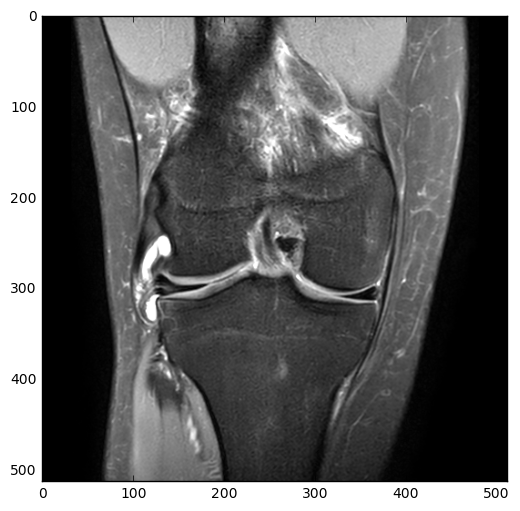

In [32]:
# Contrast stretching try 1
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (0, 99.5))

img_rescale_1 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_1, cmap=plt.cm.gray)

That rescaled image looks a lot snappier to my eye.

Let's see what the histogram looks like for this re-windowed image:

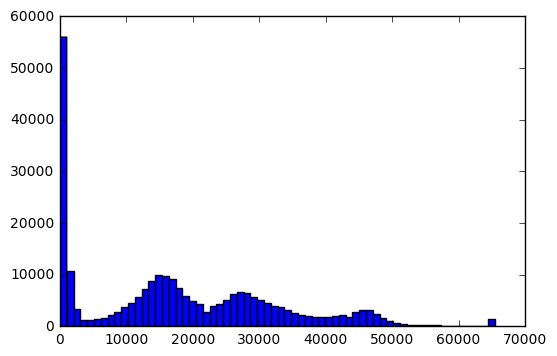

p_lo =  0.0
p_hi =  253.0


In [33]:
plt.hist(img_rescale_1.flatten(), bins=64)
plt.show()
print("p_lo = ", p_lo)
print("p_hi = ",p_hi)

From the histogram, we can see that the 99.5th percentile is equivalent to a pixel value of 253.  All pixels with values greater than or equal to 253 are mapped to white.  The histogram now shows that the window edges are indeed now very close to the edges of the visible image data.

Next, let's try dropping the upper edge of the window down to the 95th percentile.
  

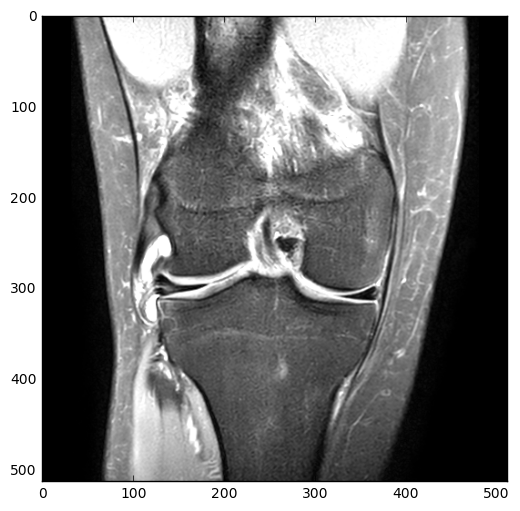

In [34]:
# Contrast stretching try 2
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (0, 95))
img_rescale_2 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_2, cmap=plt.cm.gray)

It looks as if we have gone a bit too far, and have clipped some of the detail in the brightest portions of our image.  

Let's move the upper percentile back up to 99.5 and try changing the lower percentile to 40%.

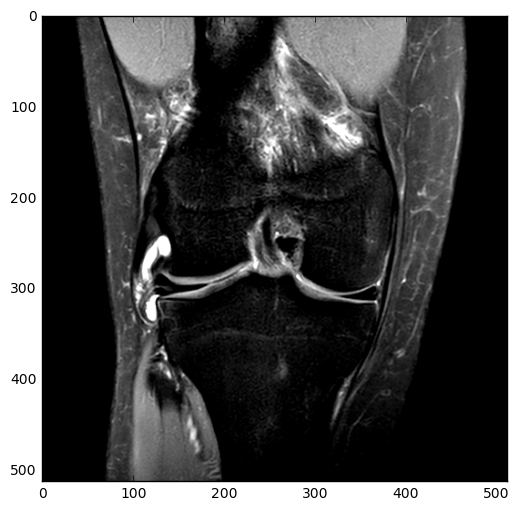

In [36]:
# Contrast stretching try 3
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (40, 99.5))
img_rescale_3 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_3, cmap=plt.cm.gray)

The brightest parts of the image look fine, but we have now clipped some of the details in the darkest portions of our image.  By trial and error, we might decide that the optimal combination of window edges is:

| Window edge | percentile | pixel value |     color      |
|:------------|-----------:|------------:|:--------------:|
| lower       |       20.0 |         3.0 | blackest black |
| higher      |       99.5 |       253.0 | whitest white  |



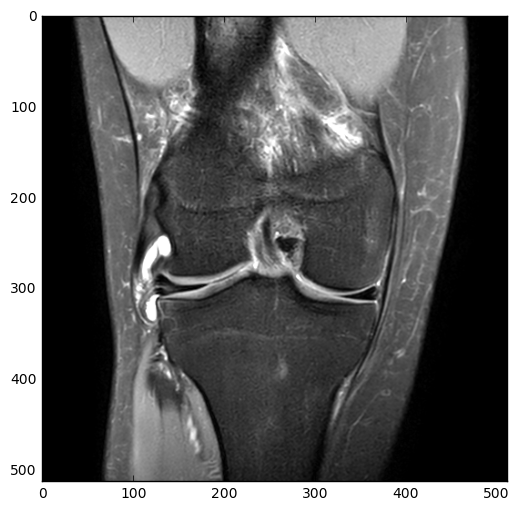

In [38]:
# Contrast stretching try 4
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (20, 99.5))
img_rescale_4 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_4, cmap=plt.cm.gray)

# save a copy of this image as a .PNG file
plt.imsave('knee_MR_contrast_stretching_try_4.png', img_rescale_4, cmap=plt.cm.gray) 

That combination actually looks pretty good.  

The trial and error method worked fine, but gets to be a bit tedious after the first few iterations.  In the next example, we will see how this process can be made easier and a bit more interactive.

### Knee radiograph

Now, let's try optimzing a plain radiograph of the knee.

In [39]:
ds2 = dicom.read_file("knee_radiograph.dcm")

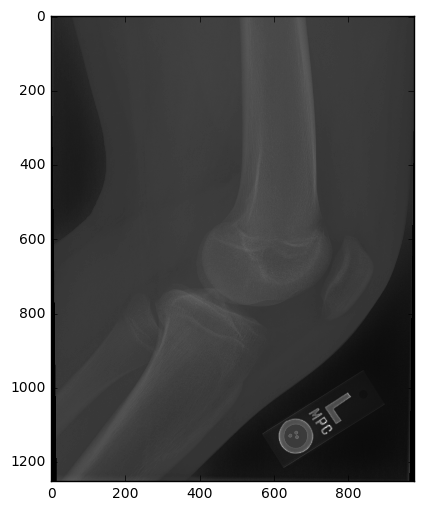

In [40]:
# original image
plt.figure(figsize = (6,6), dpi=100) 

plt.imshow(ds2.pixel_array, cmap=plt.cm.gray) 

Wow, that's pretty dark.

Rather than use the venerable trial and error method, let's see how we make this proess a bit more interactive.

Jupyter includes the ability to add [interactive widgets](http://jupyter.org/widgets.html) to a notebook, that allow one to adjust parameters and then see the results in realtime.

To do this, we will need to load the _ipywidgets_ and _IPython.display_ libraries.

In [47]:
from ipywidgets import interactive, interact, widgets, Layout, Button, Box
from IPython.display import display

Sometimes interactive widgets can lead to transient (and annoying) error messages.  We can turn those off using the following lines of Python:



In [42]:
# turn off annoying pink warnings
import warnings
warnings.filterwarnings('ignore')

Now, let's define a custom contrast stretching function that will let us tweak our image:

In [113]:
def contrast_stretch(image_name, percentile_lo, percentile_hi):
    
    image_name_global = image_name 
    p_lo, p_hi = np.percentile(eval(image_name), (percentile_lo, percentile_hi))

    img_rescale = exposure.rescale_intensity(eval(image_name), in_range=(p_lo, p_hi))

    # save optimized image array to global variable so other functions can use it
    global img_rescale_interactive, image_name_global
    img_rescale_interactive = img_rescale
    
    plt.figure(figsize = (6,6), dpi=100) 
    plt.imshow(img_rescale, cmap=plt.cm.gray)
    
    plt.show()

Next, we will display a custom Jupyter widget that will let us tweak our the settings for our window:

In [114]:
w = interactive(contrast_stretch, image_name="ds2.pixel_array", percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

By changing the level settings in our widget, we can see what the re-windowed image looks like in real-time.  This is a ***big*** improvement over the trial and error method!

Personally, I like the following window settings for this knee radiograph, but your mileage may vary:

| Window edge | percentile |     color      |
|:------------|-----------:|:--------------:|
| lower       |       19.0 | blackest black |
| higher      |       99.5 | whitest white  |

Now that we have tweaked our image to perfection, it would be nice to be able to save it easily to some other format.  The code below will create a box containing three buttons that will take care of that for us.  Don't worry about the details of the following code --- simply use it to make your life easier.

In [90]:
# create three buttons
button_TIFF = widgets.Button(description = "Save .TIFF version")
button_JPG = widgets.Button(description = "Save .JPG version")
button_PNG = widgets.Button(description = "Save .PNG version")

# package them up in a list 
items = [
    button_TIFF,
    button_JPG,
    button_PNG
]

# set up a layout for our box
box_layout = Layout(display = 'flex',
                   flex_flow = 'row',
                   align_items ='stretch'
                   )

# create a box containing our buttons
box = Box(children = items, layout = box_layout)


# these button actions will save the tweaked image in the desired format

def TIFF_button_clicked(b):
    plt.imsave(image_name_global+".tif", img_rescale_interactive, cmap=plt.cm.gray)
    
def JPG_button_clicked(b):
    plt.imsave(image_name_global+".jpg", img_rescale_interactive, cmap=plt.cm.gray)

def PNG_button_clicked(b):
    plt.imsave(image_name_global+".png", img_rescale_interactive, cmap=plt.cm.gray)

# call the appropriate function when each button is clicked

button_TIFF.on_click(TIFF_button_clicked)
button_JPG.on_click(JPG_button_clicked)
button_PNG.on_click(PNG_button_clicked)

We can now use this box of buttons in our interactive window/level code as follows:


In [103]:
w = interactive(contrast_stretch, image_name="ds2.pixel_array", percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

### Chest radiograph

Next, let's see what we can do with a chest radiograph.

In [50]:
ds3 = dicom.read_file("chest_radiograph.dcm")

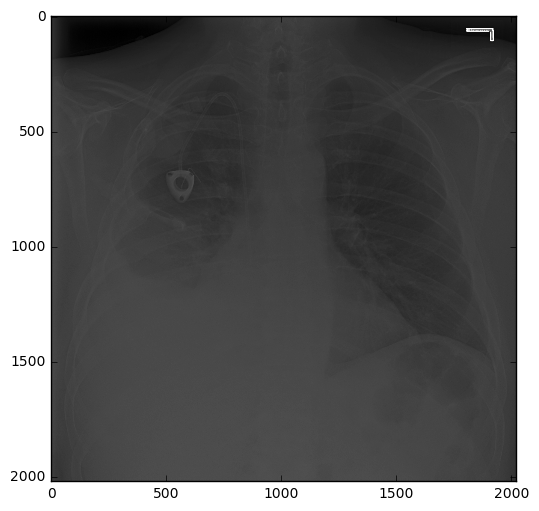

In [115]:
# original image
plt.figure(figsize = (6,6), dpi=100) 

plt.imshow(ds3.pixel_array, cmap=plt.cm.gray) 

Gosh, that's awfully dark.  Let's run this image through our interactive contrast-stretching widget.

In [116]:
image_name_global

'ds2.pixel_array'

In [117]:
w = interactive(contrast_stretch, image_name="ds3.pixel_array", percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

For my own personal taste, I found that percentile values of 3 and 99 were optimal.  Let's see what the image histogram looks like for these values:

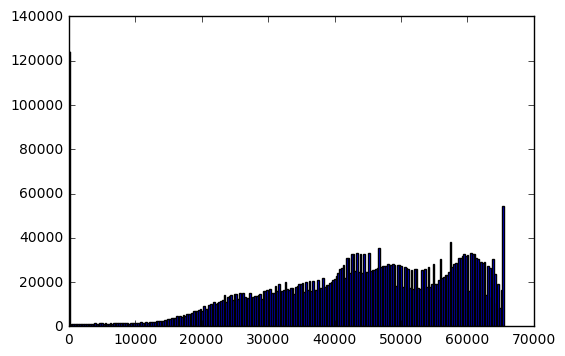

p_lo =  3321.0
p_hi =  6221.0


In [96]:
p_lo, p_hi = np.percentile(ds3.pixel_array, (3, 99))
img_rescale_1 = exposure.rescale_intensity(ds3.pixel_array, in_range=(p_lo, p_hi))

plt.hist(img_rescale_1.flatten(), bins=256)
plt.show()
print("p_lo = ", p_lo)
print("p_hi = ",p_hi)

OK, it looks like these settings map the blackest black to a pixel value of 3321 and the whitest white to a pixel value of 6221.

| Window edge | percentile | pixel value |     color      |
|:------------|-----------:|------------:|:--------------:|
| lower       |        3.0 |      3321.0 | blackest black |
| higher      |       99.0 |      6221.0 | whitest white  |

However, the price of seeing the lungs is that the bones in the spine are a bit whited out in this image.

The problem is that chest radiographs have an extremely wide dynamic range.  These images contain not only dense bone but also the bags of wind we call the lungs. Finding an optimal window/level combination that will display both of these tissues optimally can be pretty difficult with standard windowing and leveling.

One technique for optimizing images with a wide dynamic range is called _histogram equalization_.

### Histogram equalization

Let's start with _global_ histogram equalization.  We can perform histogram equilization globally throughout the image using the *exposure.equalize_hist* function from SciPy:

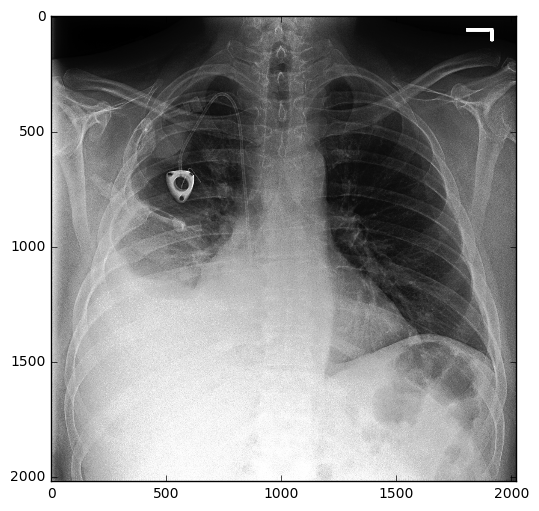

In [118]:
# global equalization

plt.figure(figsize = (6,6), dpi=100)

img_global_eq = exposure.equalize_hist(ds3.pixel_array)
figure = plt.imshow(img_global_eq, cmap=plt.cm.gray)

We can see the bones now, but the lungs are a bit dark. Unfortunately, the sci-kit image global equalization routine doesn't offer much use control over the process.

Let's have a look at the histogram for this new image:

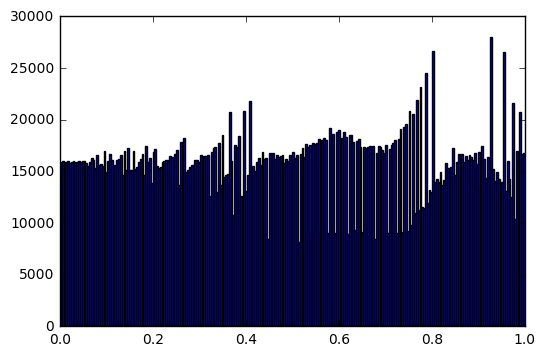

In [120]:
plt.hist(img_global_eq.flatten(), bins=256)
plt.show()

The histogram is very interesting --- the amplitude of the bars of the histogram are now much more even across the plot.

#### Adaptive equalization followed by contrast stretching

Now let's see if two manipulations work better than one.  We'll try global equalization, followed by contrast stretching.

In [119]:
w = interactive(contrast_stretch, image_name="img_global_eq", percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

Nope, it doesn't look like contrast stretching will help this image much.  This suggests that global histogram equalization routine in scikit-image is not the right algorithm for us.  

### Adaptive Histogram Equalization

As it turns out, there is yet another algorithm called adaptive histogram equalization.  Here's what the [Wikipedia has to say about it](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#CLAHE):

>It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

Another swell online resource is:

<http://scikit-image.org/docs/dev/api/skimage.exposure.html>
    
The scikit-image adaptive histogram equalization routine seems to work fine but sometimes throws an annoying number of warning messages.  [Stack Overflow](http://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython) suggests how one might turn these warnings off with the following two lines of Python:

In [121]:
import warnings
warnings.filterwarnings('ignore')

Let's see how well this works with our chest radiograph.

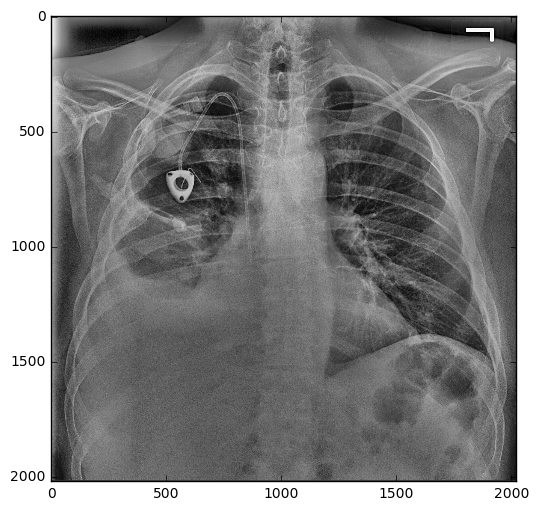

In [126]:
plt.figure(figsize = (6,6), dpi=100)

img_adaptive = exposure.equalize_adapthist(ds3.pixel_array, clip_limit=0.040)
figure = plt.imshow(img_adaptive, cmap=plt.cm.gray)


The exposure.equalize_adapthist function only has a single control: the clip_limit control.
By trial and error, we found that when clip_limit is set to 0.02, it produces an image that depicts both the bone and the lungs reasonably well on the same image.
However, take the following interactive widget for a spin, and see if you find a better setting.

In [124]:
def adaptive_histogram_equalization(clip):
    plt.figure(figsize = (6,6), dpi=100)
    
    img_adaptive = exposure.equalize_adapthist(ds3.pixel_array, clip_limit=clip)
    plt.imshow(img_adaptive, cmap=plt.cm.gray)

    plt.show()

In [125]:
w = interactive(adaptive_histogram_equalization, clip=(.005,.2,.005))

display(w)

We can see the bones now, but the lungs are a bit dark.  Unfortunately, the sci-kit image global equalization routine doesn't offer much use control over the process.

The histogram is very interesting --- the amplitude of the bars of the histogram are now much more even across the plot.

#### Adaptive equalization followed by contrast stretching

Now let's see if two manipulations work better than one.  Let's try adaptive equalization, followed by contrast stretching.  We'll start by creating a new function that will let us tweak this interactively.

***Caveat:*** The scikit-image adaptive histogram equalization function involves a ***lot*** of processing, so the image will respond somewhat sluggishly to the interactive controls.

In [130]:
def adaptive_histogram_equalization_plus_stretch(image_name, clip, percentile_lo, percentile_hi):
    plt.figure(figsize = (6,6), dpi=100)
    
    img_adaptive = exposure.equalize_adapthist(eval(image_name), clip_limit=clip)
#    plt.imshow(img_adaptive, cmap=plt.cm.gray)

    image_name_global = image_name+"adaptive_stretch" 
    p_lo, p_hi = np.percentile(img_adaptive, (percentile_lo, percentile_hi))

    img_rescale = exposure.rescale_intensity(img_adaptive, in_range=(p_lo, p_hi))

    # save optimized image array to global variable so other functions can use it
    global img_rescale_interactive, image_name_global
    img_rescale_interactive = img_rescale
    
    plt.figure(figsize = (6,6), dpi=100) 
    plt.imshow(img_rescale, cmap=plt.cm.gray)
    
    plt.show()
    

In [131]:
w = interactive(adaptive_histogram_equalization_plus_stretch, image_name="ds3.pixel_array", clip=(.005,.2,.005), percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

To my taste, the optimal set of setting was with the clip control set to just a few clicks above the bottom setting,  percentile_lo = 1.00 and percentile_hi = 99.0.  These settings result in nice-looking bones and lungs, but at the cost of some artifactual darkening over the liver.

### Equalizing a CT image

CT of the chest also has a wide dynamic range.  Let's  see how adaptive histogram equalization works with one of these images. 

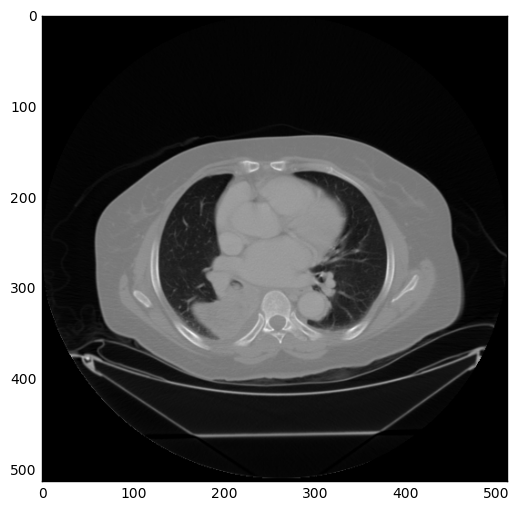

In [133]:
ds4 = dicom.read_file("CT_chest.dcm")
# original image
plt.figure(figsize = (6,6), dpi=100) 

plt.imshow(ds4.pixel_array, cmap=plt.cm.gray)

In [134]:
w = interactive(adaptive_histogram_equalization_plus_stretch, image_name="ds4.pixel_array", clip=(.005,.2,.005), percentile_lo=(1,100,.5), percentile_hi=(1,100,.5))

display(w)

box

To my taste, the optimal set of setting was with the clip control set to 0.2, percentile_lo = 11.00 and percentile_hi = 100.0. These settings result in nice-looking bones and lungs.  There is a lot less artifact on this image than on the chest radiograph.

## 7. Inverting a gray-scale image

Sometimes, when we open an image using matplotlib, a gray-scale image comes out inverted.

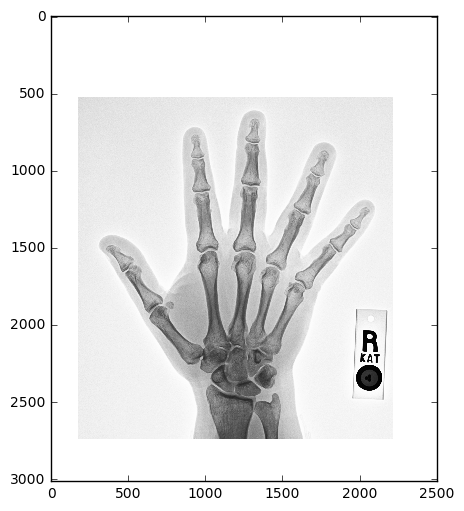

In [135]:
ds5 = dicom.read_file("Hand.dcm")

plt.figure(figsize = (6,6), dpi=100) # embiggen the figure a bit

figure = plt.imshow(ds5.pixel_array, cmap=plt.cm.gray)


Hmmm... not exactly what we were expecting. Our image appears to be inverted.  Let's see what a histogram shows...

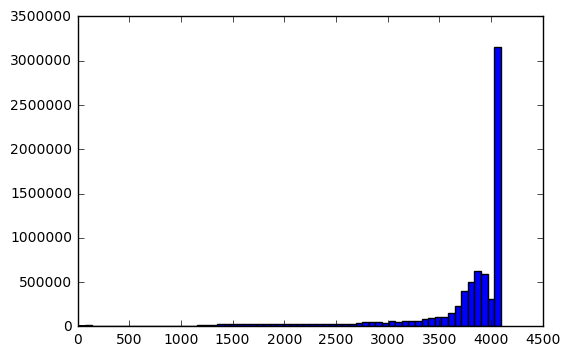

In [136]:
plt.hist(ds5.pixel_array.flatten(),bins=64)
plt.show()

Aha!  The histogram shows that most of the pixels have values way over to the right, i.e. among the light grays and whites.  If you look back at the original histograms for some of the images in the last section, you will see that most of the pixels have values way over to the left, i.e. among the blacks and dark grays.

Let's see what colorspace this image is using by interrogating the DICOM Photometric Interpretation tag (0028:0004).  This tag tells us whether we are using black or white as our starting and ending colors when leveling a window.

For gray-scale images, this should be one of the following values:

| value       | Start | End   |
|:------------|:------|:------|
| MONOCHROME1 | White | Black |
| MONOCHROME2 | Black | White |

In [139]:
# What colorspace are we using?

ds5[0x28,0x04].value

'MONOCHROME1'

If we use this same command to interrogate the colorspace of any of the images we used earlier in this tutorial, we find that all of them have a different colorspace:

In [138]:
# what colorspace are we using here?
ds1[0x28,0x04].value

'MONOCHROME2'

In [140]:
# what colorspace are we using here?
ds2[0x28,0x04].value

'MONOCHROME2'

In [141]:
# what colorspace are we using here?
ds3[0x28,0x04].value

'MONOCHROME2'

In [142]:
# what colorspace are we using here?
ds4[0x28,0x04].value

'MONOCHROME2'

### Inverting image by using a different color map

For some reason, the manufacturer of our X-ray device has chosen to save this hand image data using the 'MONOCHROME2' colorspace.  Is there something we can do to invert our image?

Fortunately, there is.  The easiest way to fix this is to simply use a different color map to display our image.  Matplotlib has a number of [preset color maps](http://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=show_colormaps). It turns out that a color map called *gist_yarg* maps the pixel values exactly opposite to that of the map called _gray_.

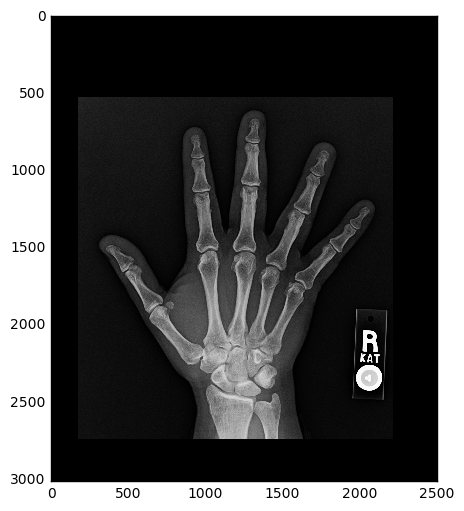

In [143]:
plt.figure(figsize = (6,6), dpi=100) 

figure = plt.imshow(ds5.pixel_array, cmap=plt.cm.gist_yarg)

### Inverting the original image data

In the example above, we inverted the image by using a different lookup table.  Now let's actually invert our original image data, i.e. we will recode the image pixels so that original black ones are now white, white are now black, light gray are now dark gray, and so on.

This happens to be fairly easy to do.

We can calculate the pixel range in our image by adding the minimum value in our array to the maximum value.  To find the inverted value of the original array, we simply subtract the value of each original pixel value from the pixel range:

$$pixel_{inverted} = pixel_{range} - pixel_{original}$$

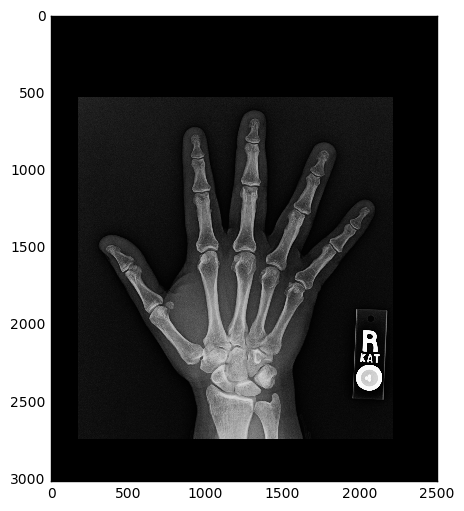

In [146]:
pixel_range = np.amin(ds1.pixel_array) + np.amax(ds5.pixel_array)

array_inverted = pixel_range - ds5.pixel_array

plt.figure(figsize = (6,6), dpi=100) 

plt.imshow(array_inverted, cmap=plt.cm.gray)

Excellent!  Just what we were hoping for.

If we plot a histogram of our image pixels, we see that it now shows that most of the pixels are located over on the left hand (black) side of the plot. 

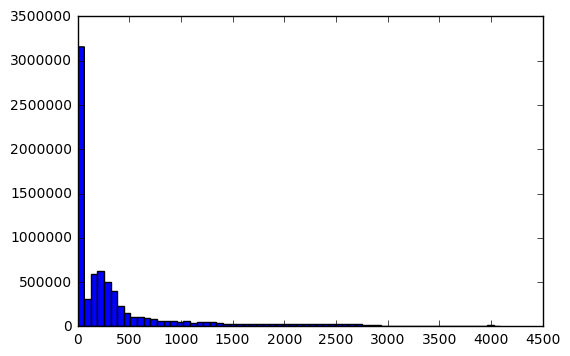

In [147]:
plt.hist(array_inverted.flatten(),bins=64)
plt.show()

Finally, let's save a copy of this image in .PNG format.

In [148]:
plt.imsave('Hand_inverted_2.png', array_inverted, cmap=plt.cm.gray)

### 8. Flipping an image about its horizontal and vertical axes

Sometimes it is handy to flip an image about its horizontal or vertical axes.  This is easy to do with two handy Numerical Python (NumPy) commands called "fliplr" and "flipud".

We will point these commands at our original knee MR.  First, the original knee MR image:

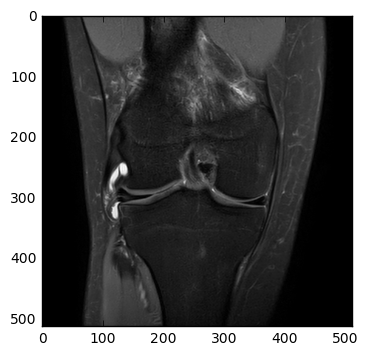

In [149]:
# display our knee MR image

plt.imshow(ds1.pixel_array, cmap=plt.cm.gray)

#### Flip the image with left and right reversed

We will use the NumPy command "fliplr" to do this.

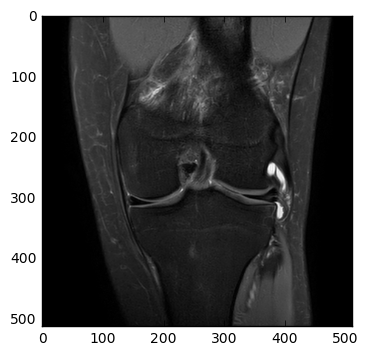

In [150]:
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(np.fliplr(ds1.pixel_array), cmap=plt.cm.gray)

#### Flip the image with up and down reversed

We will use the NumPy command "flipud" to do this.

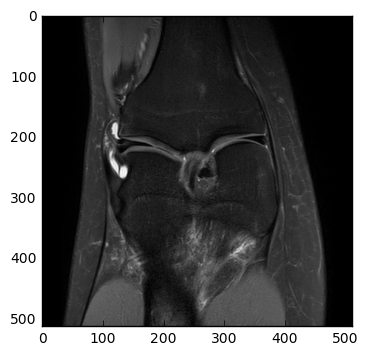

In [151]:
# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(np.flipud(ds1.pixel_array), cmap=plt.cm.gray)

### 9. Opening a color DICOM image

So far, we've only been dealing with gray-scale images.  However, some medical images contain color.  If we simply try opening a color image using the code we've used so far, the results may be a bit bizarre.

Let's start with an image from a color doppler ultrasound study.

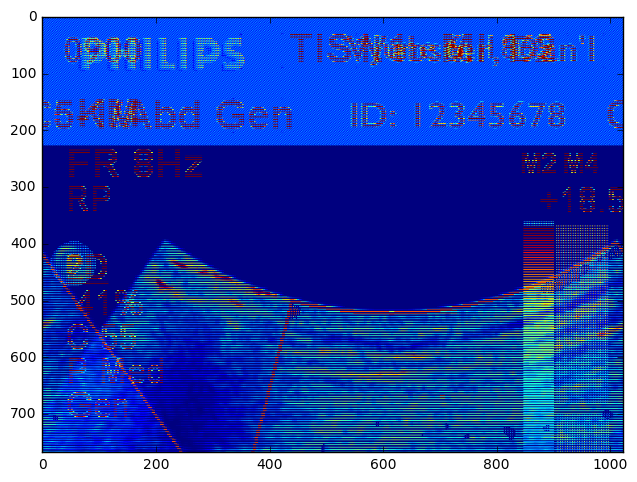

In [169]:
ds6 = dicom.read_file("US_fake_PHI.dcm") # read in a color DICOM image

plt.figure(figsize = (7.5,10), dpi=100) # embiggen the figure a bit

figure = plt.imshow(ds6.pixel_array[0])
plt.show() # display the image

Hmmm... not quite what we were hoping for.  The problem here is that gray-scale pixels have one value per pixel, while color pixels have more than one.

As a start, let's s find out what colorspace this image is using by interrogating the DICOM tag (0x28, 0x04).

|    value    |  type of image  |
|:-----------:|:---------------:|
|     RGB     |   color image   |
| MONOCHROME2 | grayscale image |

In [155]:
ds6[0x28,0x04].value

'RGB'

OK, it looks like we are dealing with a color image using the RGB (red-green-blue) colorspace.  Next, let's see how many bits are allocated per color channel:

In [156]:
ds6[0x28,0x100].value

8

We have 8 bits per color channel, as one might expect in a standard 24 bit RGB image, such as a JPEG file.  The next step is to see how the color channels are configured in our image.

### What is the planar configuration of the color channels?

In other words, how are the color channels arranged in the pixel data buffer?  Usually, this is done in one of two formats: interlaced or separated.  There is a very nice figure in [Chapter 12 - Pixel Data](http://dicomiseasy.blogspot.co.il/2012/08/chapter-12-pixel-data.html) on the wonderful [DICOM is Easy](http://dicomiseasy.blogspot.co.il) site that shows what this means in a nice pictorial fashion.

We will learn how our image is configured by interrogating the (0x28,0x06) DICOM tag.

| value |            type of image            |
|:-----:|:-----------------------------------:|
|   0   | interlaced (the most common method) |
|   1   |              separated              |


In [158]:
ds6[0x28,0x06].value

0

OK, it seems like our color channels are interlaced.  The next step is to de-interlace this data.  

First, let's find out the shape of our DICOM pixel array...

In [159]:
ds6.pixel_array.shape

(3, 768, 1024)

Matplotlib, the routine that Jupyter will be using to display the images, prefers to see the data in a different format: (768,1024,3).  Reshaping (and thus de-interlacing) the data is easy to do in numerical Python (numpy) using the _reshape_ routine.

In [160]:
pixel_array_reshaped = ds6.pixel_array.reshape((768,1024,3))

Now let's display this de-interlaced pixel array...

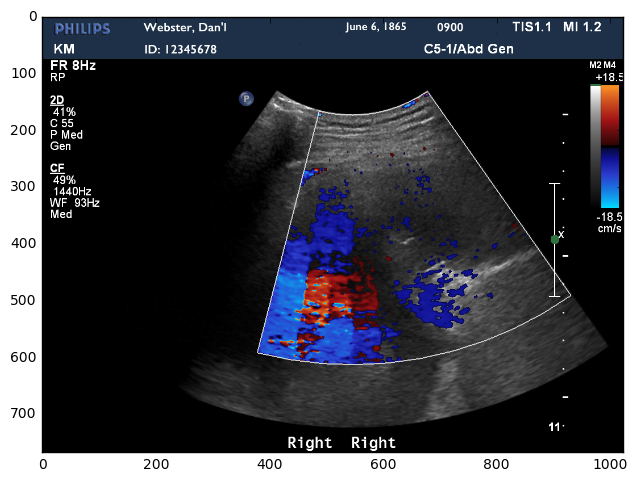

In [163]:
plt.figure(figsize = (7.5,10), dpi=100) 

figure = plt.imshow(pixel_array_reshaped)
plt.show() # display the original image

There, that's a lot better!  Now that we have successfully displayed the image, let's save a copy in some other format:

In [164]:
plt.imsave('US_image.png', pixel_array_reshaped)
plt.imsave('US_image.jpg', pixel_array_reshaped)
plt.imsave('US_image.tif', pixel_array_reshaped)

#### Your mileage may vary...

The code above worked just fine for our 768 x 1024 color US image.  However, if you are trying to open and display some other image type with different sizes of images, you will have to modify the code above to reflect those different sizes.

### 10. Redacting PHI embedded in images

Some image types, such as ultrasound or radionuclide images have PHI embedded in the pixel array.  

Redacting parts of a DICOM image is not difficult.  Let's look at two use cases:

1. redacting the entire header at the top of the image (easiest)
2. redacting selected portions of the image (slightly more tedious)

#### Redacting the entire header

Let's start with some simple code to convert the first _n_ rows of the image to black pixels.


In [167]:
ds6 = dicom.read_file("US_fake_PHI.dcm") # read in a DICOM image with embedded text

pixel_array_reshaped = ds6.pixel_array.reshape((768,1024,3)) # de-interlace the image

pixel_array_redacted = pixel_array_reshaped.copy() # make a copy of the original data

The next line of Python code below sets the number of rows that we want to set to black.

The code after that uses a feature of Python called [slicing](http://pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/).  Slicing allows one to selectively extract or alter portions of an array.  [Slicing is only slightly more complex with a multidimensional array](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#indexing-slicing-and-iterating), such as the pixel array we have pulled out of our DICOM file.

The part of the code preceding the equals sign selects a slice that is equal to the first _n_ rows of pixels in our image. Let's start with n = 20. 

In [174]:
n = 20 # choose the number of rows that we want to set to black

pixel_array_redacted[0:n, ] = 0 # set all of the digits in the first n rows to zeros

Now, let's display the image and see how well it worked.

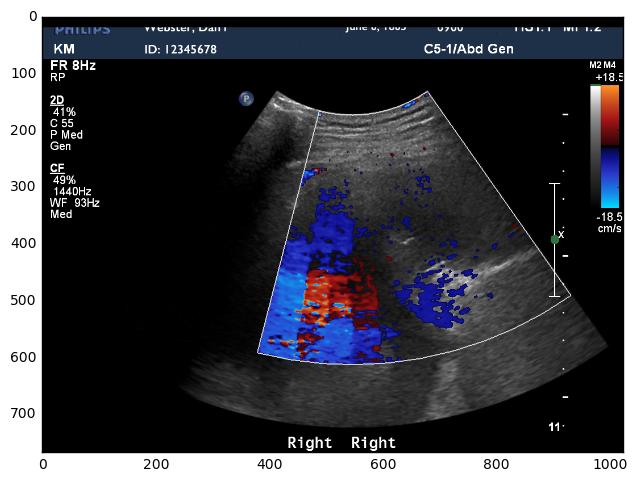

In [175]:
plt.figure(figsize = (7.5,10), dpi=100) # embiggen the figure a bit

figure = plt.imshow(pixel_array_redacted)
plt.show()

Try exprimenting with different values of _n_.  

By trial and error, I found that _n = 76_ works pretty well to crop out the entire header for this specific ultrasound image.

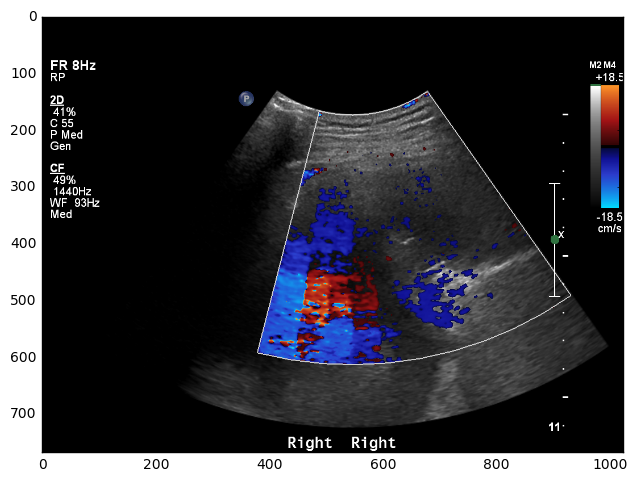

In [176]:
n = 76  # choose the number of rows that we want to set to black

pixel_array_redacted[0:n, ] = 0 # set all of the digits in the first n rows to zeros

plt.figure(figsize = (7.5,10), dpi=100) # embiggen the figure a bit

figure = plt.imshow(pixel_array_redacted)
plt.show()

plt.imsave('US_redacted_topheader.jpg', pixel_array_redacted) # save a copy of this in .JPG format

Now, let's save this redacted pixel array into a new DICOM image.  Before we can do so, we need to first do two things:

1. convert the color data back from numpy format into the interlaced form the way DICOM expects it
2. write the changes in the pixel_array back to the [DICOM PixelData attribute](http://pydicom.readthedocs.io/en/stable/working_with_pixel_data.html)

In [179]:
redacted_reshaped = pixel_array_redacted.reshape((3,768,1024)) # re-interlace the data
ds6.PixelData = redacted_reshaped.tostring() # write changes back to the DICOM PixelData attribute
ds6.save_as("US_redacted_topheader.dcm") # create a new DICOM image file with our redactions

#### Redacting only selected portions of the image

For various reasons, you may prefer to redact only selected portions of the image.  This can be done fairly easily converting several different slices of the image to black.

The original version of the US image we have been working with has the patient name, study date, study time and patient ID number embedded in the image.  

Let's create some specific slices on this image that create black rectangles over the PHI.

Here's the original image again:

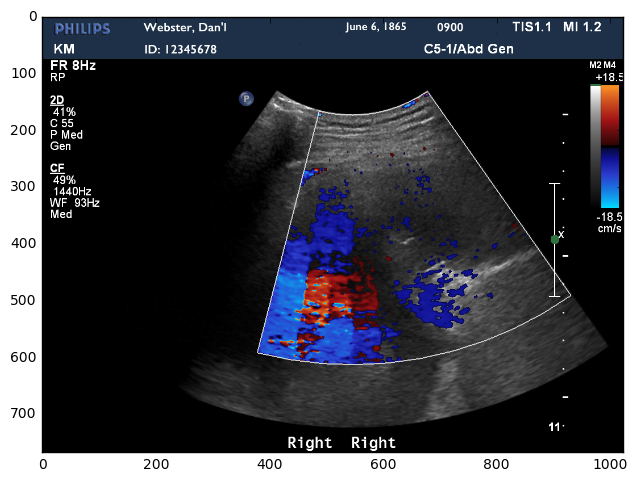

In [181]:
ds6 = dicom.read_file("US_fake_PHI.dcm") # read in a DICOM image with embedded text
pixel_array_reshaped = ds6.pixel_array.reshape((768,1024,3)) # de-interlace the pixel array

plt.figure(figsize = (7.5, 10), dpi=100) # embiggen the figure a bit

plt.imshow(pixel_array_reshaped)
plt.show() # display the image

By trial and error, we found that the values listed in the code below redact four items of PHI from the embedded image header.

In [182]:
pixel_array_redacted = pixel_array_reshaped.copy() # make a copy of the original pixel data

# start redacting pixels by drawing black rectangles

# redact name
pixel_array_redacted[10:31, 140:458 ] = 0 # zero rows 10--31, columns 140--458

# redact study date
pixel_array_redacted[10:31, 525:650 ] = 0 # zero rows 10--31, columns 525--650

# redact study time
pixel_array_redacted[10:31, 670:800 ] = 0 # zero rows 10--31, columns 670--800

# redact patient number
pixel_array_redacted[48:69, 140:454 ] = 0 # zero rows 48--69, columns 140--454

Now let's see how this looks.

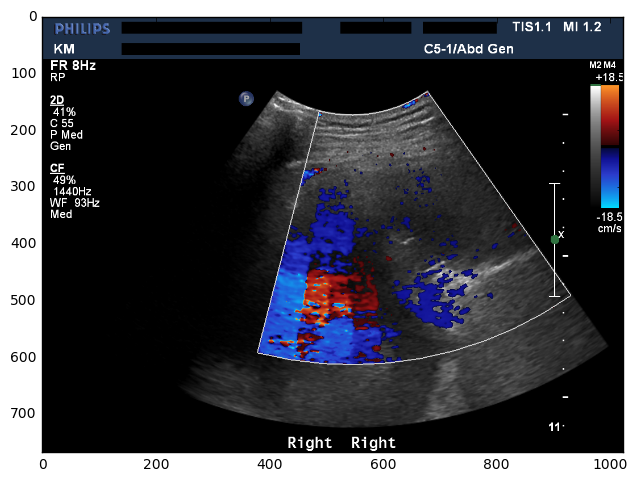

In [183]:
# show the results
plt.figure(figsize = (7.5,10), dpi=100) # embiggen the figure a bit

figure = plt.imshow(pixel_array_redacted)
plt.show()

Success!

Now, for practice, see if you can create another slice that will also redact the embedded text that reads "C5-1/Abd Gen".

Below is the code that we used:

In [184]:
# redact "C5-1/Abd Gen"
pixel_array_redacted[48:69, 670:830 ] = 0 # zero rows 48--69, columns 670--830

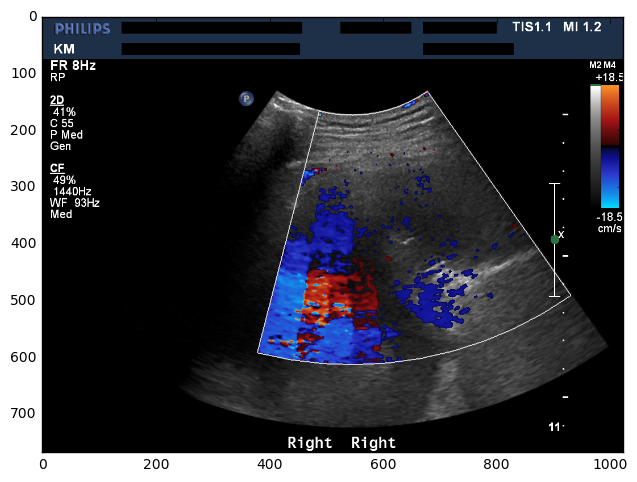

In [185]:
# show the results
plt.figure(figsize = (7.5,10), dpi=100) # embiggen the figure a bit

figure = plt.imshow(pixel_array_redacted)
plt.show()

plt.imsave('US_redacted.tif', pixel_array_redacted) # save a copy as .TIF

In a similar fashion, one can redact any other parts of the image.

Now, to wrap things up, let's save this redacted image into a new DICOM image file.

The code below will:

1. re-interlace the data
2. write the changes back to the DICOM PixelData attribute
3. save the changes into a new DICOM image file that contains our redactions

In [187]:
redacted_reshaped = pixel_array_redacted.reshape((3,768,1024))  # re-interlace the data
ds6.PixelData = redacted_reshaped.tostring()  # write changes back to the DICOM PixelData attribute
ds6.save_as("US_redacted_selected.dcm")  # create a new DICOM image file with our redactions